*WEEK 3 ASSIGNMENT*

**LOGISTIC REGRESSION**

In [63]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:\Users\Naman\Downloads\IPL2016.csv"
df = pd.read_csv(file_path)
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.head())

X = np.array(df.loc[:, 'overall_sr'])
y = np.array(df.loc[:, 'won'])

# Normalizing X
X = X / 250
X,y

   overall_sr  won
0  168.817204    1
1  165.432099    0
2  121.568627    0
3  149.541284    1
4  151.898734    0


(array([0.67526882, 0.6617284 , 0.48627451, 0.59816514, 0.60759494,
        0.49795918, 0.448     , 0.7147541 , 0.6       , 0.36470588,
        0.88971963, 0.65365854, 0.86923077, 0.45283019, 0.64489796,
        0.57560976]),
 array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64))

***CREATING THE REGRESSION MODEL***

In [66]:

def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate, num_iterations):
    # Initialize parameters: theta
    theta = np.random.randn()
    bias = 0
    m = y.shape[0]
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted probabilities using the sigmoid function.
        z = np.dot(X, theta) + bias
        predictions = sigmoid(z)

        # Calculate the error: y_pred - y
        error = predictions - y

        # Calculate the gradients:
        gradientsw = np.dot(X.T, error) / m
        gradientsb = np.sum(error) / m

        # Update parameters:
        theta -= learning_rate * gradientsw
        bias -= learning_rate * gradientsb

        # Calculate the cost function: log loss
        cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        cost_history.append(cost)

    return theta, bias, cost_history

learning_rate = 0.01
num_iterations = 150000

W, b, cost_history = logistic_regression(X, y, learning_rate, num_iterations)

W,b



(11.322308264230198, -6.474260269547648)

**PLOTTING THE COST FUNCTION HISTORY AND THE REGRESSION LINE**

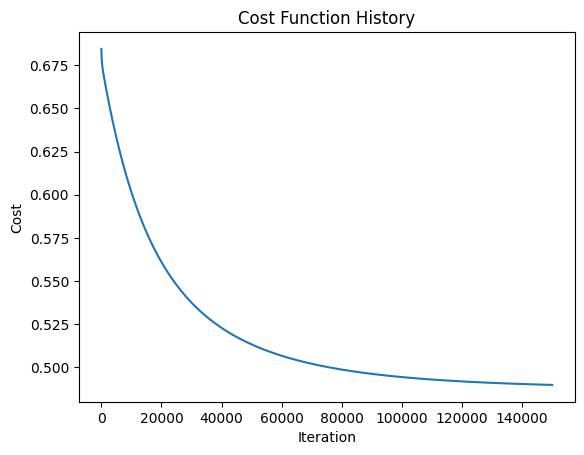

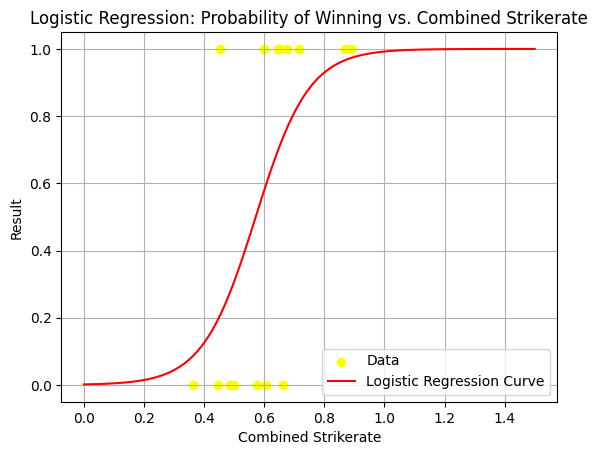

In [69]:
# Plot cost function history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

# Plot logistic regression result
plt.scatter(X, y, c='yellow', label='Data')
X_axis = np.linspace(0, 1.5, 100)
plt.plot(X_axis, sigmoid(X_axis * W + b), c='red', label='Logistic Regression Curve')
plt.xlabel('Combined Strikerate')
plt.ylabel('Result')
plt.title('Logistic Regression: Probability of Winning vs. Combined Strikerate')
plt.legend()
plt.grid(True)
plt.show()


***FUNCTION TO PREDICT WIN PERCENTAGE***

In [74]:
def WINFUNCTION(StrikeRate):
    StrikeRate = StrikeRate / 250
    global W, b
    x=sigmoid(W*StrikeRate+b)*100
    print("Chance to Win is",x,"%")

WINFUNCTION(169)

Chance to Win is 76.48794929277231 %
